In [1]:
import caffe

In [2]:
!wget https://www.dropbox.com/s/x27ye1v9l3ivn0h/sphereface_model.caffemodel

--2017-09-09 19:25:27--  https://www.dropbox.com/s/x27ye1v9l3ivn0h/sphereface_model.caffemodel
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.1, 2620:100:6019:1:ffff:ffff:a27d:401
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/4S4d1hDvJWNh6Kjgt3Dx2R0g9jDsVwlLVRmV9LbTtWFWpvdwcce3zbOwAVeWVhAQ/file [following]
--2017-09-09 19:25:28--  https://dl.dropboxusercontent.com/content_link/4S4d1hDvJWNh6Kjgt3Dx2R0g9jDsVwlLVRmV9LbTtWFWpvdwcce3zbOwAVeWVhAQ/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.4.6, 2620:100:6019:6:ffff:ffff:a27d:406
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.4.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90688218 (86M) [application/octet-stream]
Saving to: 'sphereface_model.caffemodel'

100%[======================================>] 9

In [3]:
caffe.set_mode_cpu();
net = caffe.Net("../dvalib/sphereface/sphereface_deploy.prototxt", 'sphereface_model.caffemodel',caffe.TEST)

In [5]:
import sys
sys.path.append('/opt/ctpn/CTPN/tools/')
sys.path.append('/opt/ctpn/CTPN/src/')
from cfg import Config as cfg
from other import draw_boxes, resize_im, CaffeModel
import cv2, os, caffe, sys
from detectors import TextProposalDetector, TextDetector
import os.path as osp
from utils.timer import Timer
from IPython.core.display import Image, display


NET_DEF_FILE="/opt/ctpn/CTPN/models/deploy.prototxt"
MODEL_FILE="/opt/ctpn/CTPN/models/ctpn_trained_model.caffemodel"

caffe.set_mode_cpu()
text_proposals_detector=TextProposalDetector(CaffeModel(NET_DEF_FILE, MODEL_FILE))
text_detector=TextDetector(text_proposals_detector)

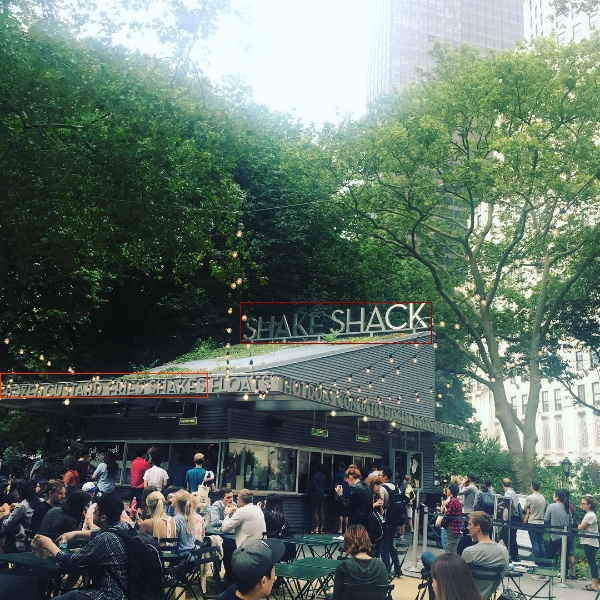

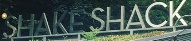

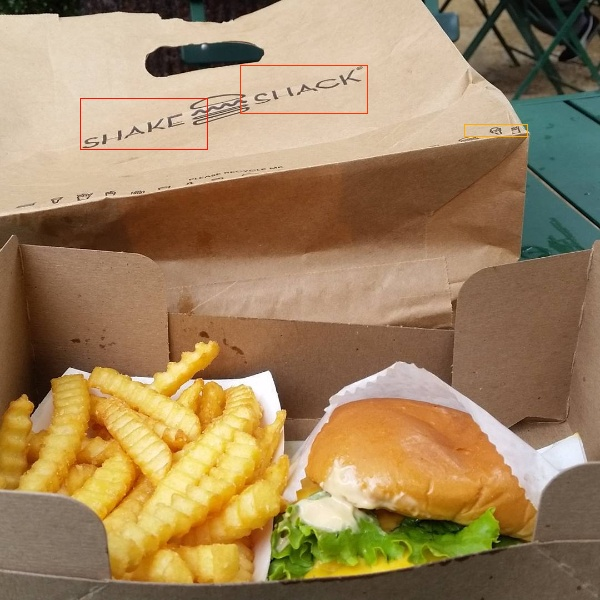

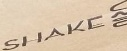

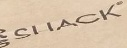

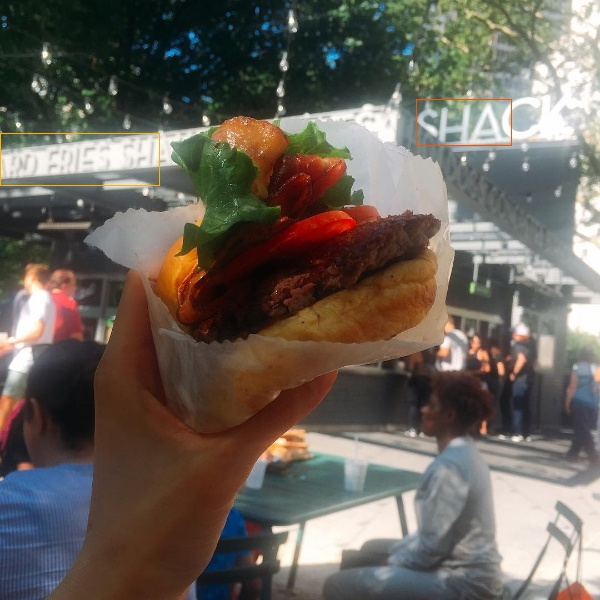

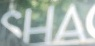

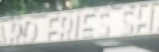

In [9]:
from glob import glob
timer=Timer()
try:
    os.mkdir('boxes')
except:
    pass
box_count = 0
for im_name in glob('OCR/images/*.jpg'):
    im_file=osp.join(im_name)
    im=cv2.imread(im_file)
    timer.tic()
    im, f=resize_im(im, cfg.SCALE, cfg.MAX_SCALE)
    text_lines=text_detector.detect(im)        
    im_with_text_lines=draw_boxes(im, text_lines, caption=im_name, is_display=False)
    cv2.imwrite('out.jpg',im_with_text_lines)
    display(Image('out.jpg'))
    for k in text_lines:
        top,left,bottom,right,score = k 
        crop_img = im[int(left):int(right),int(top):int(bottom)]
        cv2.imwrite('boxes/box_{}.jpg'.format(box_count),crop_img)
        display(Image('boxes/box_{}.jpg'.format(box_count)))
        box_count += 1